# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Create sqlite data base

In [2]:
# Get current working directory
print(os.getcwd())

# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

U:\Lektionen\DA_HS2022\KK\Week_02
apartment_database.db


## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                                Rooms DECIMAL(8,2),
                                                                Area INT(8),
                                                                Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
df = pd.read_csv('apartments_data_prepared.csv', 
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(23, 4)


,web-scraper-order,rooms,area,price
0,1662029560-13,2.5,71.0,1500
1,1662029560-5,4.0,90.0,2030
2,1662029560-23,1.0,22.0,770
3,1662029560-12,2.5,70.0,1740
4,1662029560-3,3.5,70.0,1950


## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

23

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute('''SELECT * FROM apartments_table 
                  WHERE Rooms >= 3.0 
                  AND Price > 1500''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Rooms','Area','Price'])    
print(df)

          OrderId  Rooms   Area  Price
0    1662029560-5    4.0   90.0   2030
1    1662029560-3    3.5   70.0   1950
2    1662029560-2    3.5   95.0   3000
3    1662029560-7    4.5  108.0   3160
4   1662029560-10    4.5  105.0   2850
5    1662029560-1    3.5   87.0   2075
6   1662029560-21    4.0   86.0   1896
7   1662029560-15    4.5   88.0   2416
8    1662029560-9    3.5   71.0   1790
9   1662029560-20    4.5    NaN   3020
10   1662029560-8    3.5   80.0   2420
11  1662029560-14    3.5  101.0   2880
12  1662029560-19    3.5    NaN   2710


## Plot histogramm of rental prices

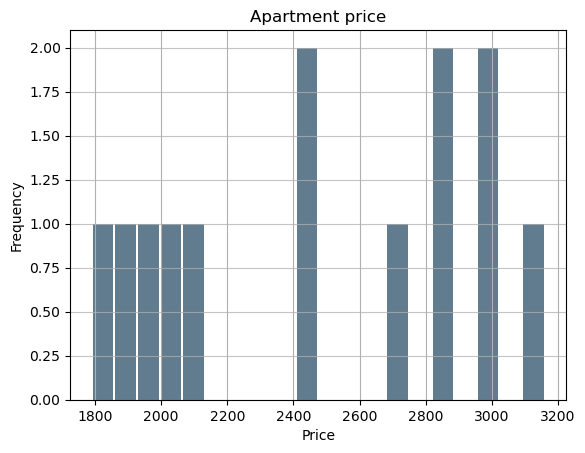

In [7]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

conn.close()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2022-09-24 15:44:07
Python Version: 3.9.13
-----------------------------------
